In [61]:
#importing libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [144]:
#reading all files
os.chdir("/Users/rakeshravi/Documents/Data Mining - R/Project/")
airlines = pd.read_csv('airlines.csv', index_col=False)
airports = pd.read_csv('airports.csv', index_col=False)
flights = pd.read_csv('flights.csv', index_col=False, low_memory=False)

In [145]:
#Understand airlines dataset
airlines.shape[0] #no of rows=14
airlines.shape[1] #no of columns=2
airlines.head()

#This is a lookup between IATA_CODE and AIRLINE (name)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [146]:
#Airports
airports.shape[0] #no of rows=322
airports.shape[1] #no of columns=7
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [147]:
#Flights
flights.shape[0] #no of rows = 5819079
flights.shape[1] #no of columns = 31
flights.tail()
#there are some columns which have a mixed data types which causes a bunch of errors but that can be averted by setting
#low_memory = FALSE while reading the CSV.
#flights = pd.read_csv('flights.csv', index_col=False, low_memory=False)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#Column list
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

# Fields Definition - Flights



1. YEAR, MONTH, DAY, DAY_OF_WEEK are timestamp characterestics.
2. AIRLINE - airline code is mentioned but the name of the carrier can be obtained from merging flights <> airlines.
3. FLIGHT_NUMBER - flight identifier
4. TAIL_NUMBER - Aircraft Identifier
5. SCHEDULED_DEPARTURE - Planned Departure time
## 6. DEPARTURE_TIME = WHEELS_OFF - TAXI_OUT
7. DEPARTURE_DELAY = total delay on departure
8. TAXI_OUT - The time duration elapsed between gate departure from the origin airport gate and wheels of time.
9. WHEELS_OFF - The time at which aircraft leaves the ground
10. SCHEDULED_TIME - Planned time for the flight trip to be completed
## 11. ELAPSED_TIME - TAXI_OUT + AIR_TIME + TAXI_IN
## 12. AIR_TIME - WHEELS_ON - WHEELS_OFF
13. WHEELS_ON - The time at which the flight lands on the ground
14. TAXI_IN - The time duration between gate arrival at the destination airport and wheels on time.
15. SCHEDULED_ARRIVAL - Planned Arrival time
## 16. ARRIVAL_TIME = WHEELS_ONN + TAXI_IN
17. ARRIVAL_DELAY = total delay on arrival
18. DIVERTED - Flag for flight landing in an airport out of schedule
19. CANCELLED - Flag for cancellation 
20. CANCELLATION_REASON - Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
21. AIR_SYSTEM_DELAY - Time delay caused by air system
22. SECURITY_DELAY - Time delay caused by security
23. AIRLINE_DELAY - Time delay caused by the airline
24. LATE_AIRCRAFT_DELAY - Time delay caused by aircraft
25. WEATHER_DELAY - Time delay caused by weather
26. ORIGIN_AIRPORT, DESTINATIOn_AIRPORT AND DISTANCES have their usual meanings. Although there is more potential to merge flights with airports data to get lat,longs of the airports

In [149]:
#Validating the bold relationships in the box above
flights[['ELAPSED_TIME','TAXI_IN','AIR_TIME','TAXI_OUT','ARRIVAL_TIME','WHEELS_ON','WHEELS_OFF','ARRIVAL_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_TIME','SCHEDULED_ARRIVAL','SCHEDULED_DEPARTURE']][0:5]

,ELAPSED_TIME,TAXI_IN,AIR_TIME,TAXI_OUT,ARRIVAL_TIME,WHEELS_ON,WHEELS_OFF,ARRIVAL_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE
0,194.0,4.0,169.0,21.0,408.0,404.0,15.0,-22.0,2354.0,-11.0,205.0,430,5
1,279.0,4.0,263.0,12.0,741.0,737.0,14.0,-9.0,2.0,-8.0,280.0,750,10
2,293.0,11.0,266.0,16.0,811.0,800.0,34.0,5.0,18.0,-2.0,286.0,806,20
3,281.0,8.0,258.0,15.0,756.0,748.0,30.0,-9.0,15.0,-5.0,285.0,805,20
4,215.0,5.0,199.0,11.0,259.0,254.0,35.0,-21.0,24.0,-1.0,235.0,320,25


# Formatting Time

In [150]:
# Converting Year, Month, Day into one for EDA 
flights['TIMESTAMP'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])

In [151]:
#Function to convert HHMM into datetime object
def format_here(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if chain == 2400: chain = 0
        chain = "{0:04d}".format(int(chain))
        here = datetime.time(int(chain[0:2]), int(chain[2:4]))
        return here

In [152]:
#applying the functions from above to some features in flights
flights['SCHEDULED_DEPARTURE'] = flights['SCHEDULED_DEPARTURE'].apply(format_here)
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_here)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_here)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_here)
flights.loc[:5, ['TIMESTAMP','SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]


#Formatting looks perfect and delay is in minute. Everything seems to adding up
#There is no need to format other variables.

,TIMESTAMP,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01,00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01,00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01,00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01,00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01,00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01,00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


# Some Data Cleaning 

In [ ]:
#merging flights, airlines and airports
#airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
#airport_dict = dict(zip(airports['IATA_CODE'],airports['AIRPORT']))
#flights['AIRLINE_NAME'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
#flights.head()

In [153]:
#converting DELAY into a categorical variable with labels one or zero based on the definition of delay by DOT
#source - https://www.bts.gov/topics/airlines-and-airports/airline-time-performance-and-causes-flight-delays
flights.loc[flights.ARRIVAL_DELAY >= 15, 'Class'] = 1
flights.loc[flights.ARRIVAL_DELAY < 15, 'Class'] = 0
flights.groupby(["Class"]).size()

Class
0.0    4650569
1.0    1063439
dtype: int64

In [106]:
# Dropping rows that have cancelled ==1
flights_d = flights.loc[flights["CANCELLED"]!=1]
flights_d = flights_d.drop(["CANCELLED", "CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"], axis =1)
#89,884 cancellations removed

In [108]:
flights_d.dtypes

YEAR                 int64
MONTH                int64
DAY                  int64
DAY_OF_WEEK          int64
DEPARTURE_DELAY    float64
TAXI_OUT           float64
WHEELS_OFF         float64
SCHEDULED_TIME     float64
ELAPSED_TIME       float64
AIR_TIME           float64
DISTANCE             int64
WHEELS_ON          float64
TAXI_IN            float64
Class              float64
dtype: object

In [107]:
#remove some variables before PCA
variables_to_remove = ['TIMESTAMP', 'DIVERTED', 
                       'FLIGHT_NUMBER', 'TAIL_NUMBER','ARRIVAL_DELAY','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_TIME','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ARRIVAL_TIME']
flights_d.drop(variables_to_remove, axis = 1, inplace = True)

In [111]:
#there are some NAN values across the dataframe. Dropping them
flights_d = flights_d.dropna()

# Principal Component Analysis


Doing this only for the numerical and float variables to see the percentage of explained variance. 

In [ ]:
#Standard scaling all regressors except Class
from sklearn.preprocessing import StandardScaler
pred_variables = flights_d.loc[:, flights_d.columns != 'Class']
resp_variables = flights_d.loc[:, flights_d.columns == 'Class']
scaler = StandardScaler()
pred_variables[pred_variables.columns] = scaler.fit_transform(pred_variables[pred_variables.columns])

In [133]:
#combining predictors and response variable
df_c = pd.concat([pred_variables.reset_index(drop=True), resp_variables], axis=1)
#dropping year because the data is just for one year
df_c.drop(["YEAR"], axis =1)
df_c = df_c.dropna()

In [131]:
#Class size
df_c.loc[df_c["Class"]==1].shape

(1030728, 14)

In [134]:
df_c = df_c.sample(10000)

explained variance ratio (first two components): [0.34917143 0.14439551]


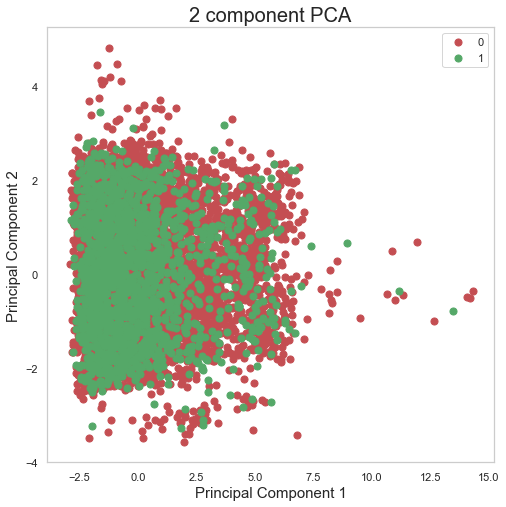

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X = df_c.loc[:, df_c.columns != 'Class']
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

#combining PCs and response variable
X_c = pd.concat([pd.DataFrame(data=X_r).reset_index(drop=True), resp_variables], axis=1)
X_c.columns = ['PC1', 'PC2',"Class"]

#Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = X_c['Class'] == target
    ax.scatter(X_c.loc[indicesToKeep, 'PC1']
               , X_c.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

YEAR                 int64
MONTH                int64
DAY                  int64
DAY_OF_WEEK          int64
DEPARTURE_DELAY    float64
TAXI_OUT           float64
WHEELS_OFF         float64
SCHEDULED_TIME     float64
ELAPSED_TIME       float64
AIR_TIME           float64
DISTANCE             int64
WHEELS_ON          float64
TAXI_IN            float64
Clearly these variables dont have too much impact in predicting the outcome in the problem.

# Missing Values

In [154]:
#removing all columns that have too many missing values and are not relevant to the analysis
flights = flights.loc[flights["CANCELLED"]!=1]
variables_to_remove = ["CANCELLED", "CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"]
flights.drop(variables_to_remove, axis = 1, inplace = True)

In [155]:
#checking for missing values
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['Missing Data (%)']=(missing_df['missing values'])*100/flights.shape[0]
missing_df.sort_values('Missing Data (%)').reset_index(drop = True)

#clearly the percentage of missing values is less than 0.2% 
#makes sense to remove those rows as loss in data is pretty small in magnitude

,variable,missing values,Missing Data (%)
0,YEAR,0,0.000000
1,DIVERTED,0,0.000000
2,SCHEDULED_ARRIVAL,0,0.000000
3,DISTANCE,0,0.000000
4,WHEELS_OFF,0,0.000000
5,TIMESTAMP,0,0.000000
6,DEPARTURE_DELAY,0,0.000000
7,DEPARTURE_TIME,0,0.000000
8,SCHEDULED_DEPARTURE,0,0.000000
9,TAXI_OUT,0,0.000000


In [158]:
#final row and column count
flights = flights.dropna()
flights.shape

(5714008, 26)

#  Comparing Airlines

In [161]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

#WN seems to have the highest number of delays but the average is the highest for NK. The lowest number of delays and the lowest mean
#was observed for HA

,count,max,mean,min
AIRLINE,,,,
VX,61248.0,644.0,8.993486,-24.0
HA,76041.0,1433.0,0.469918,-27.0
F9,90090.0,1112.0,13.303352,-46.0
NK,115193.0,836.0,15.883101,-37.0
AS,171439.0,963.0,1.718926,-82.0
US,194223.0,759.0,6.081000,-28.0
B6,262042.0,1006.0,11.442467,-31.0
MQ,278791.0,1544.0,9.967187,-36.0
UA,507762.0,1314.0,14.333056,-40.0


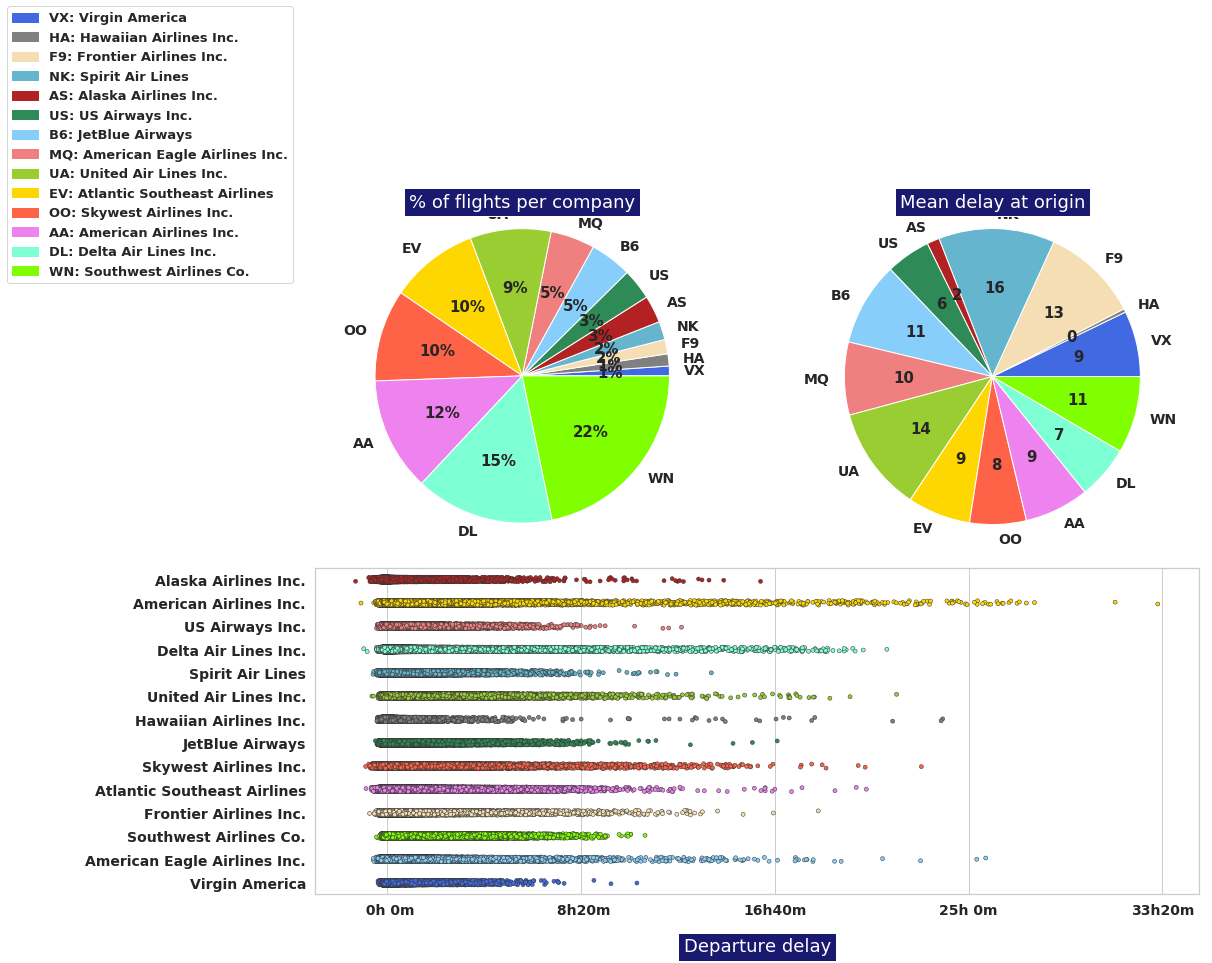

In [163]:
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
# Extract a subset of columns and redefine the airlines labeling 
df2 = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

# striplot with all the values reported for the delays

# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 